In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

data_low = pd.read_csv('005930.KS.csv')

data = data_low

data= data.dropna() # 결측치 제거
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [4]:
# RNN 구조로 데이터를 준비
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [6]:
normalized_data = [] #정규화 작업
normalized_data_price = []

for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]

    normalized_data.append(normalized_window)

result = np.array(normalized_data)
#result = np.array(normalized_data_price)

row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((175, 50, 1), (19, 50, 1))

In [7]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
18/18 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 4.0617e-04
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0212
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 4.5209e-04
Epoch 5/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0025 - val_loss: 8.2661e-04
Epoch 9/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 4.7355e-04
Epoch 10/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 4.7446e-0

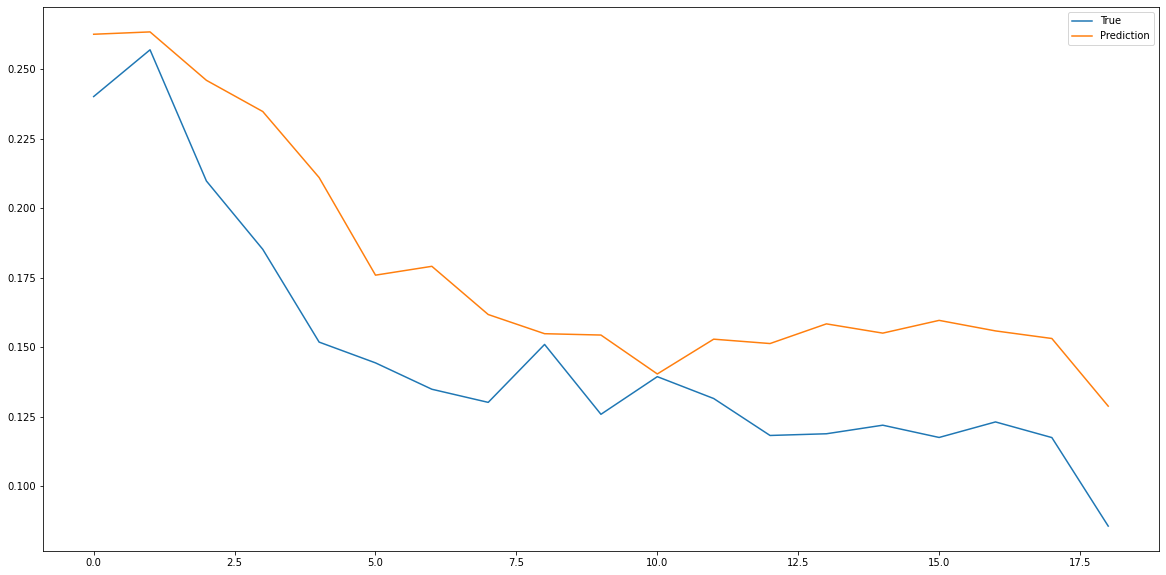

In [9]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()